In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#time steps
m = 100
t = np.linspace(0,1,m)

In [3]:
#sin(10t)
f = np.array([np.sin(10*x) for x in t])

In [4]:
#constructing A
n = 14         #degree of polynomial
A = []
for x in t:
    row = [x**i for i in range(n)]
    A.append(row)
A = np.array(A)

# QR Decomposition (Modified Gram Schmidt)

In [5]:
# QR

Q = np.zeros((m,n))
R = np.zeros((n,n))
v = []
for x in A:
    v.append(x)
v = np.array(A)
    
for i in range(n):
    R[i,i] = np.linalg.norm(v[:,i])
    Q[:,i] = v[:,i]/R[i,i]
    for j in range(i+1,n):
        R[i,j] = np.dot(Q[:,i],v[:,j])
        v[:,j] = v[:,j] - R[i,j]*Q[:,i]

In [6]:
# Solving Rx = Q^T b, Backsubstitution

QTb = np.dot(np.transpose(Q),f) 
xQR = [0]*n
for i in range(13,-1,-1):
    sub = 0
    for j in range(13,i,-1):
        sub += xQR[j]*R[i][j]
    xQR[i] = (QTb[i]-sub)/R[i][i]

In [7]:
# polynomial fitting

QRpolynomial = ''
for i in range(n):
    QRpolynomial += str(xQR[i])+'*x**'+str(i)+'+'
QRfit = []
for x in t:
    QRfit.append(eval(QRpolynomial[:-1]))

# QR Decompotition (Householder factorization)

In [8]:
# forming upper tringular R

R = []
for x in A:
    R.append(x)
R = np.array(R)

v = []
for i in range(n):
    x = R[i:m,i]
    e1 = [1]
    e1.extend([0]*(m-i-1))
    e1 = np.array(e1)
    vi = np.sign(x[0])*np.linalg.norm(x)*e1 + x
    vi = vi/np.linalg.norm(vi)
    v.append(vi)
    vi = np.array([[entry] for entry in vi])
    R[i:m,i:n] = R[i:m,i:n] - 2*np.dot(vi,np.dot(np.transpose(vi),R[i:m,i:n]))

In [9]:
# forming Q^T b

QTb = []
for j in f:
    QTb.append(j)
        
for i in range(n):
    vi = np.array([[entry] for entry in v[i]])
    QTb[i:m] = QTb[i:m] - 2*np.dot(vi,np.dot(np.transpose(vi),QTb[i:m]))


In [10]:
#Solving Rx = Q^T b, Backsubstitution

xQR_hh = [0]*n
for i in range(13,-1,-1):
    sub = 0
    for j in range(13,i,-1):
        sub += xQR_hh[j]*R[i][j]
    xQR_hh[i] = (QTb[i]-sub)/R[i][i]

In [11]:
# polynomial fitting 

QRpolynomial_hh = ''
for i in range(n):
    QRpolynomial_hh += str(xQR_hh[i])+'*x**'+str(i)+'+'
QRfit_hh = []
for x in t:
    QRfit_hh.append(eval(QRpolynomial_hh[:-1]))

# SVD

In [12]:
u,s,v = np.linalg.svd(A)

In [13]:
b = np.dot(np.transpose(u),f)
x = [b[i]/s[i] for i in range(n)]
SVDx = np.dot(np.transpose(v),x)

In [14]:
# polynomial fitting 

SVDpolynomial = ''
for i in range(n):
    SVDpolynomial += str(SVDx[i])+'*x**'+str(i)+'+'
SVDfit = []
for x in t:
    SVDfit.append(eval(SVDpolynomial[:-1]))

# Normal Equation

In [15]:
# forming (A^T)A and (A^T)b

B = np.dot(np.transpose(A),A)
b = np.dot(np.transpose(A),f)

In [16]:
# solving (A^T)A x = (A^T)b
normalx = np.dot(np.linalg.inv(B),b)

In [17]:
# polynomial fitting 

Normalpolynomial = ''
for i in range(n):
    Normalpolynomial += str(normalx[i])+'*x**'+str(i)+'+'
Normalfit = []
for x in t:
    Normalfit.append(eval(Normalpolynomial[:-1]))

# True Solve using numpy library

In [18]:
true = np.linalg.lstsq(A, f, rcond=None)[0]

truepolynomial = ''
for i in range(n):
    truepolynomial += str(true[i])+'*x**'+str(i)+'+'
truefit = []
for x in t:
    truefit.append(eval(truepolynomial[:-1]))
truefit = np.array(truefit)

# Plotting

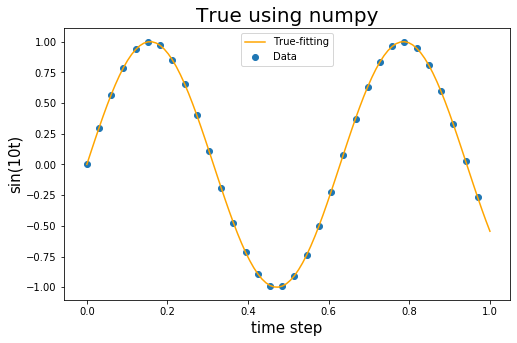

In [19]:
# true sol

fig = plt.figure(1,figsize=(8,5))
plt.title('True using numpy', size = 20)
plt.xlabel('time step', size=15)
plt.ylabel("sin(10t)", size=15)
plt.scatter(t[0:-1:3],f[0:-1:3])
plt.plot(t,truefit,color='orange')
plt.legend(['True-fitting','Data'], loc="upper center")
plt.savefig("true.jpg")

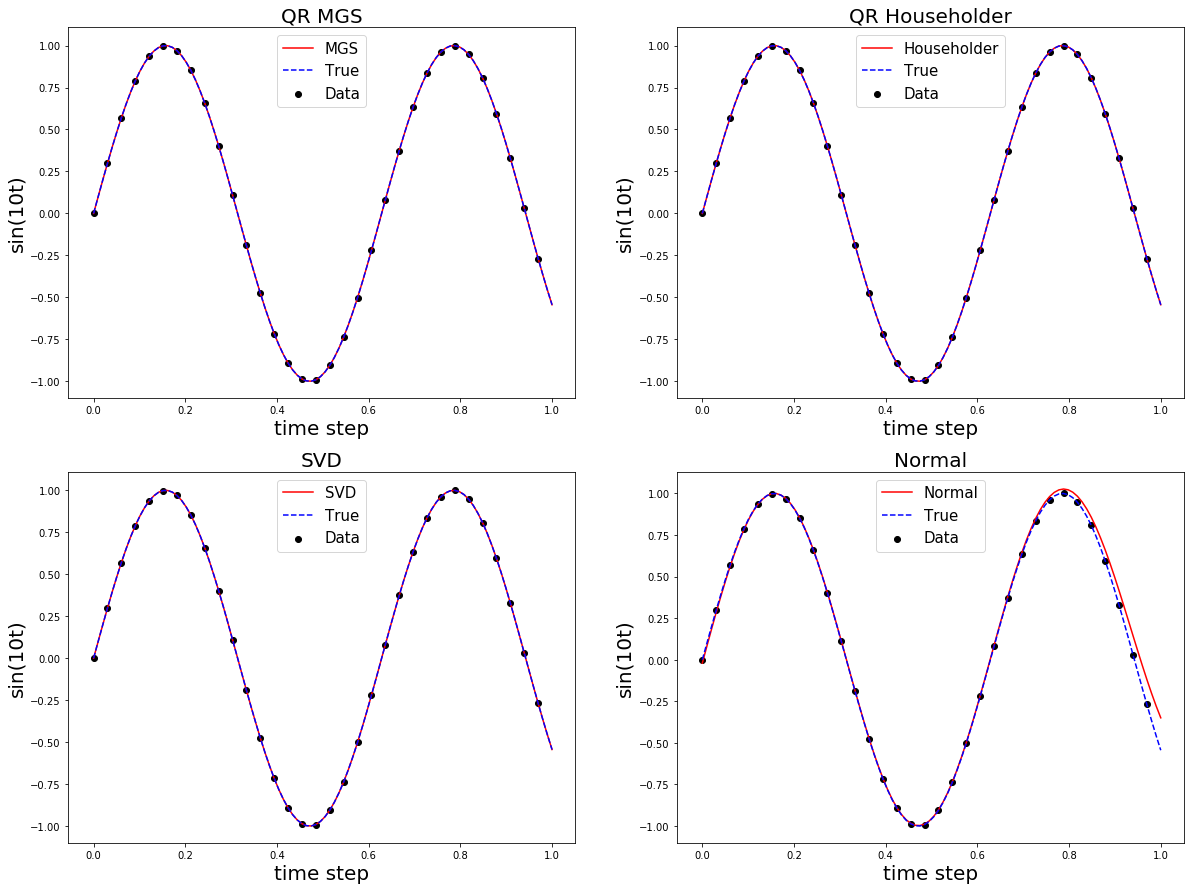

In [20]:
fig = plt.figure(1,figsize=(20,15))
plt.subplot(2,2,1)
plt.title('QR MGS', size = 20)
plt.xlabel('time step', size=20)
plt.ylabel("sin(10t)", size=20)
plt.scatter(t[0:-1:3],f[0:-1:3],color='black')
plt.plot(t,QRfit,color='red')
plt.plot(t,truefit,color='blue', linestyle='dashed')
plt.legend(['MGS','True','Data'], loc="upper center", fontsize=15)

plt.subplot(2,2,2)
plt.title('QR Householder', size = 20)
plt.xlabel('time step', size=20)
plt.ylabel("sin(10t)", size=20)
plt.scatter(t[0:-1:3],f[0:-1:3],color='black')
plt.plot(t,QRfit_hh,color='red')
plt.plot(t,truefit,color='blue', linestyle='dashed')
plt.legend(['Householder','True','Data'], loc="upper center", fontsize=15)

plt.subplot(2,2,3)
plt.title('SVD', size = 20)
plt.xlabel('time step', size=20)
plt.ylabel("sin(10t)", size=20)
plt.scatter(t[0:-1:3],f[0:-1:3],color='black')
plt.plot(t,SVDfit,color='red')
plt.plot(t,truefit,color='blue', linestyle='dashed')
plt.legend(['SVD','True','Data'], loc="upper center", fontsize=15)

plt.subplot(2,2,4)
plt.title('Normal', size = 20)
plt.xlabel('time step', size=20)
plt.ylabel("sin(10t)", size=20)
plt.scatter(t[0:-1:3],f[0:-1:3],color='black')
plt.plot(t,Normalfit,color='red')
plt.plot(t,truefit,color='blue', linestyle='dashed')
plt.legend(['Normal','True','Data'], loc="upper center", fontsize=15)

plt.savefig("comparison.jpg")

# Error

In [21]:
diff1 = abs(truefit-QRfit)
diff2 = abs(truefit-QRfit_hh)
diff3 = abs(truefit-SVDfit)
diff4 = abs(truefit-Normalfit)

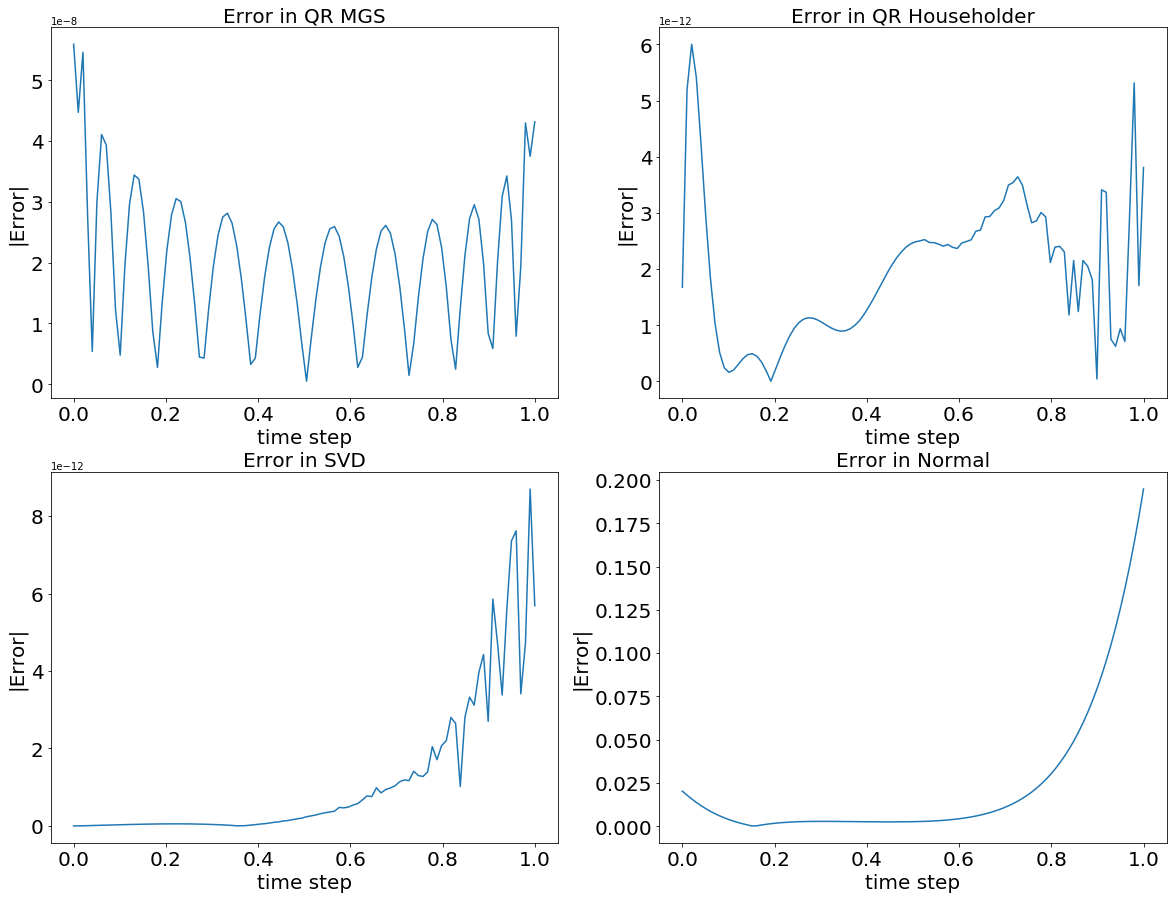

In [22]:
fig = plt.figure(1,figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Error in QR MGS', size = 20)
plt.xlabel('time step', size=20)
plt.ylabel("|Error|", size=20)
plt.plot(t,diff1)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(2,2,2)
plt.title('Error in QR Householder', size = 20)
plt.xlabel('time step', size=20)
plt.ylabel("|Error|", size=20)
plt.plot(t,diff2)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(2,2,3)
plt.title('Error in SVD', size = 20)
plt.xlabel('time step', size=20)
plt.ylabel("|Error|", size=20)
plt.plot(t,diff3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(2,2,4)
plt.title('Error in Normal', size = 20)
plt.xlabel('time step', size=20)
plt.ylabel("|Error|", size=20)
plt.plot(t,diff4)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.savefig("error.jpg")